In [ ]:
#                                                             Exploratory Data Analysis (EDA):

In [ ]:
#    1.	Load the Titanic dataset using Python's pandas library.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv('A13.csv')
data.info()

In [2]:
#    2.	Check for missing values.

In [3]:
(data == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [4]:
data.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [5]:
# close to 0 -->                   roughly symmetric --> mean
# far from 0 ( e.g, >1 or <-1 ) --> highly skewed    --> median

In [6]:
#                                                      Data Preprocessing:
#            1.Impute missing values

zero_cols =['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
data[zero_cols] = data[zero_cols].replace(0,np.nan)

for col in ['BloodPressure','Insulin']:
    data[col].fillna(data[col].median())

for col in ['Glucose','SkinThickness','BMI']:
    data[col].fillna(data[col].mean())

In [7]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [8]:
#    3.	Explore data distributions using histograms and box plots.

<Axes: xlabel='Outcome'>

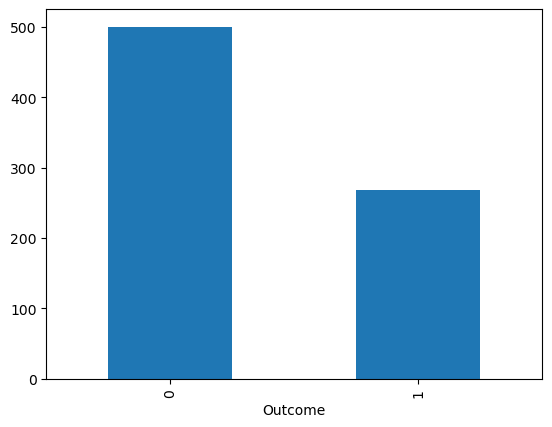

In [9]:
data['Outcome'].value_counts().plot(kind='bar')

In [10]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

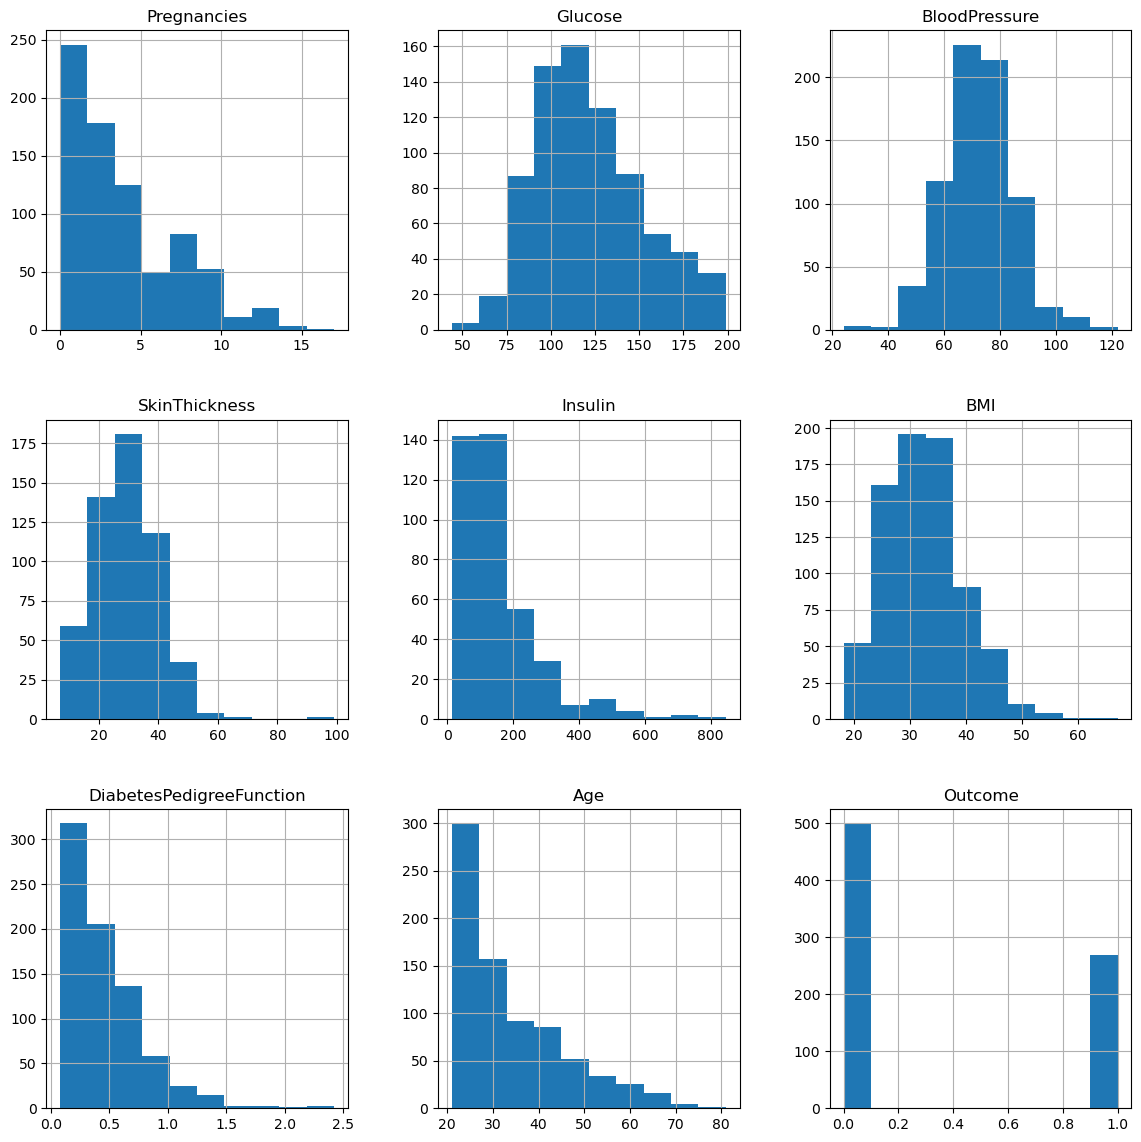

In [11]:
data.hist(figsize=(14,14))

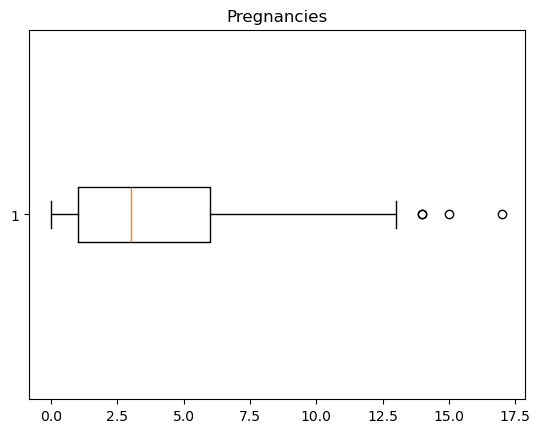

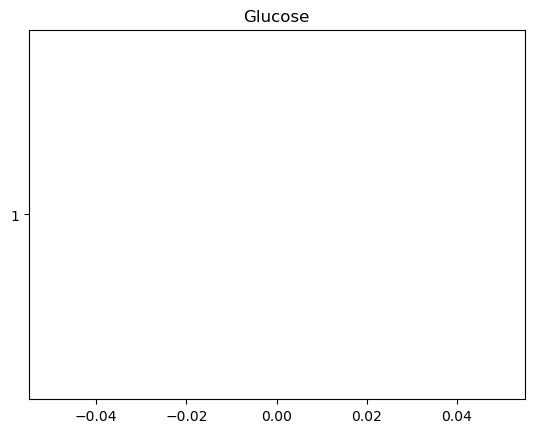

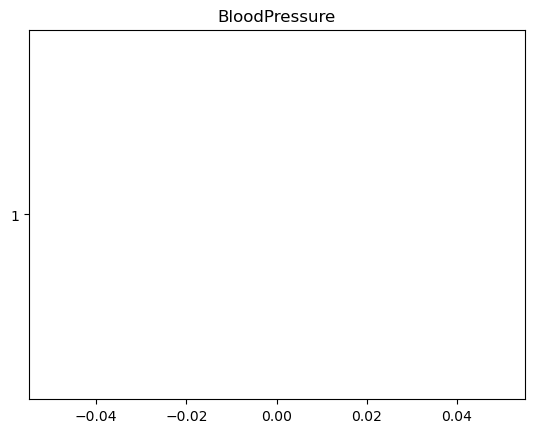

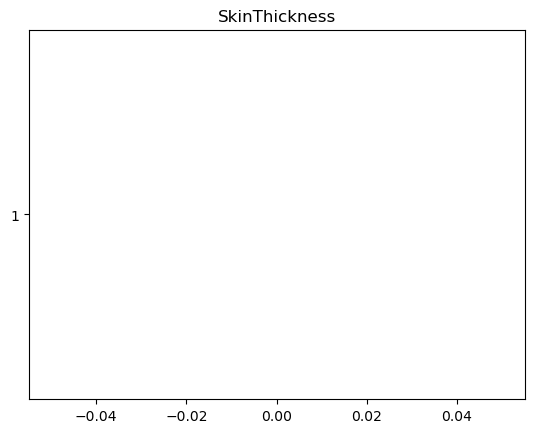

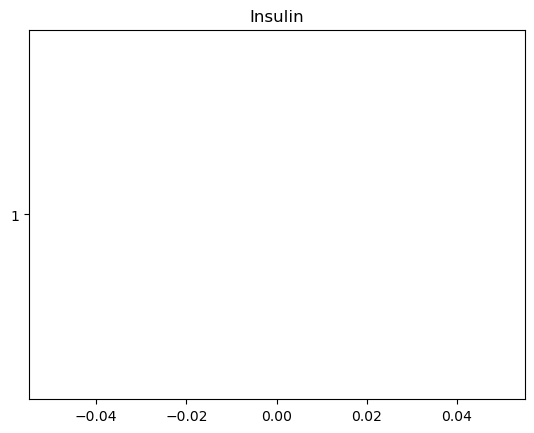

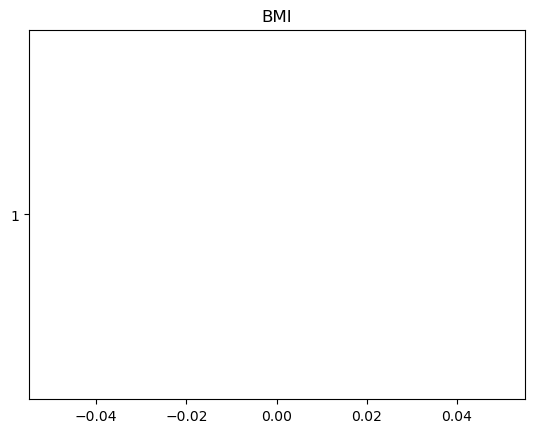

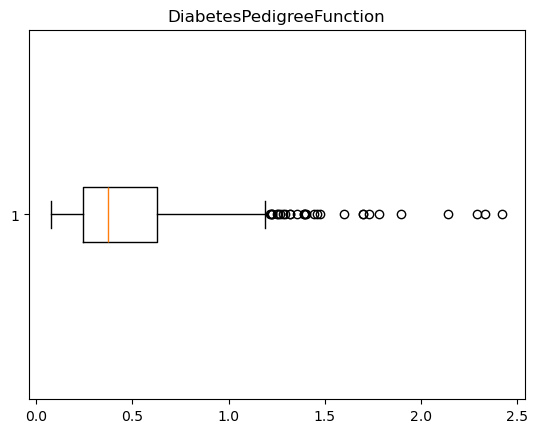

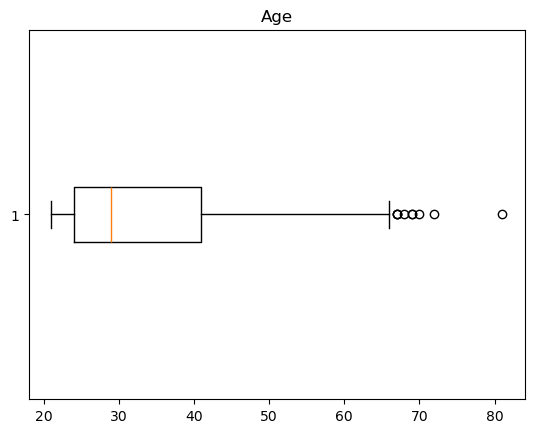

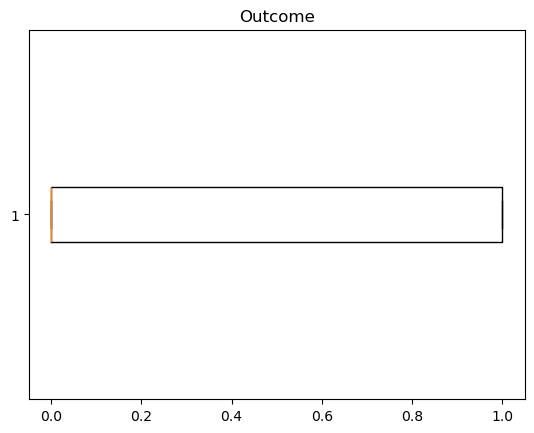

In [14]:
import matplotlib.pyplot as plt

for col in data.columns:
    plt.boxplot(data[col],vert=False)
    plt.title(col)
    plt.show()

<Axes: >

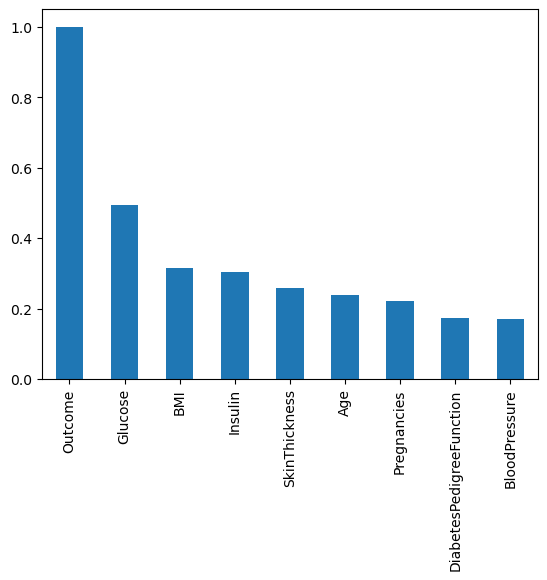

In [14]:
data.corr()['Outcome'].abs().sort_values(ascending=False).plot(kind='bar')

In [15]:
#    4.	Visualize relationships between features and survival using scatter plots and bar plots.

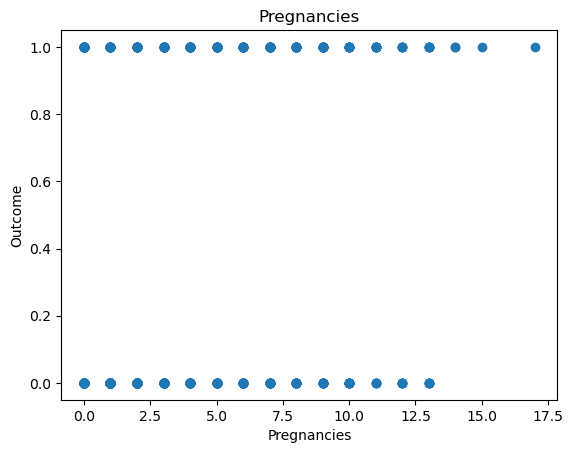

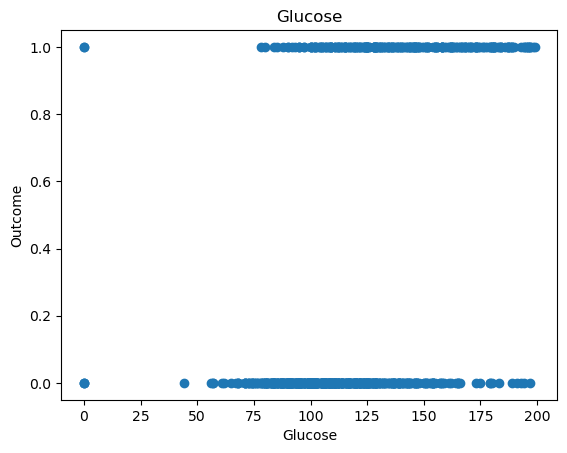

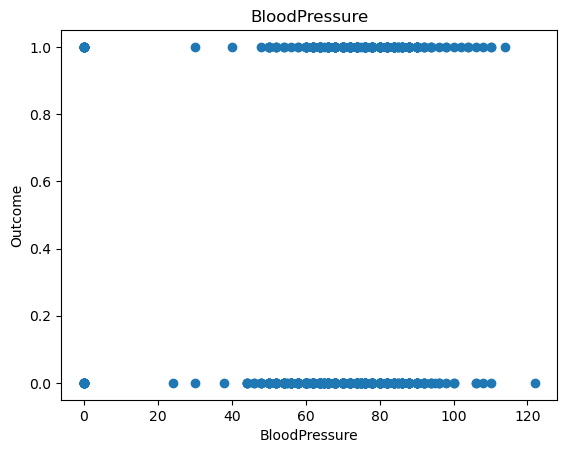

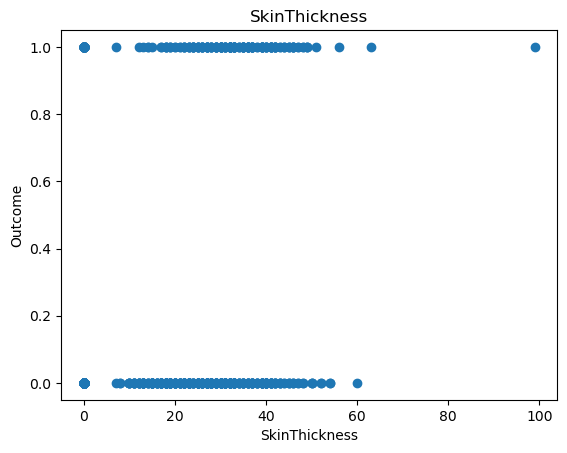

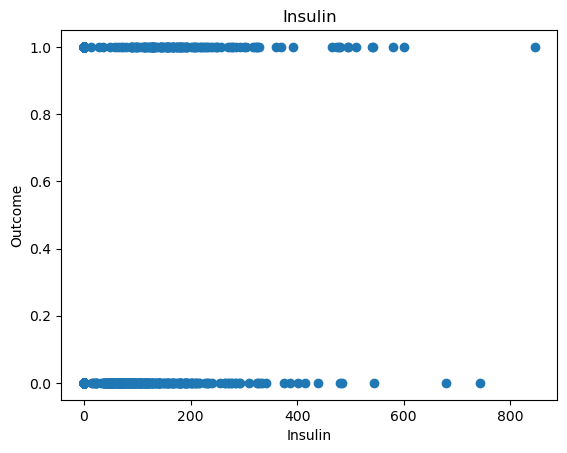

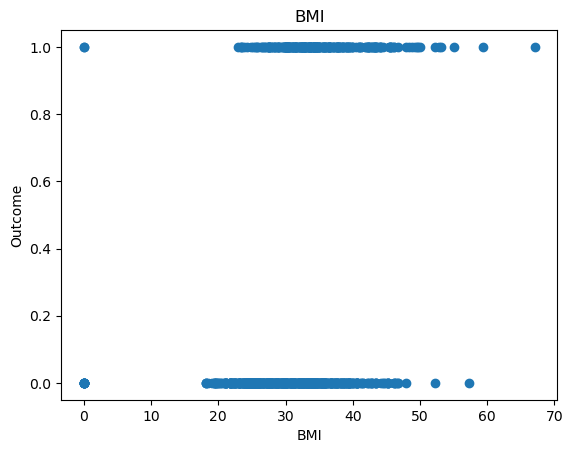

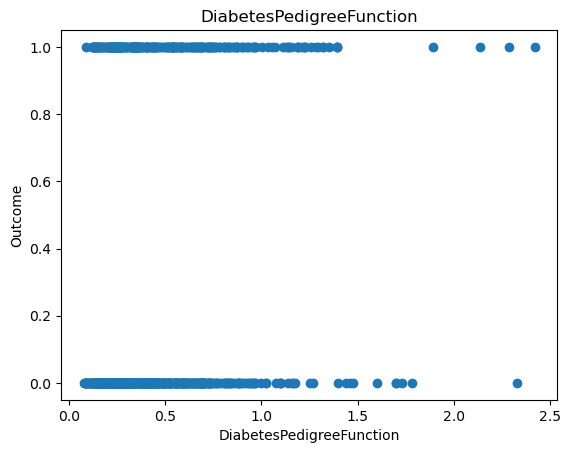

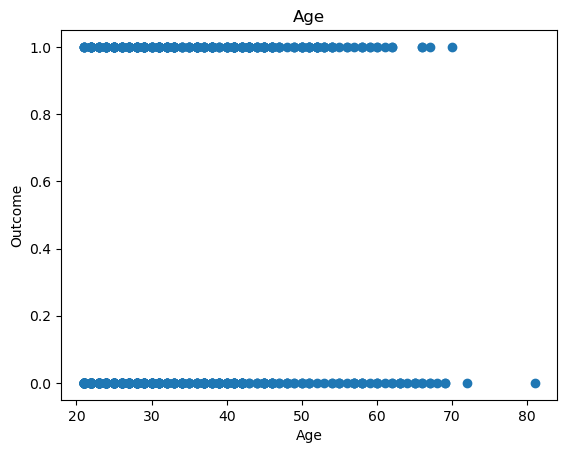

In [19]:
x = data.drop(columns=['Outcome'])
y = data['Outcome']

for i in x:
    plt.scatter(data[i],y)
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('Outcome')
    plt.show()

In [17]:
#                                                               Data Preprocessing:

In [ ]:
#    2.	Encode categorical variables using one-hot encoding or label encoding. 
''' There are no categorical values in the dataset'''

In [ ]:
#    3.	If needed you can apply more preprocessing methods on the given dataset.
'''  There is no categorical data for encoding
    Missing values are imputed '''

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x = scaler.fit_transform(x)

In [ ]:
#                                                              Building Predictive Models:

In [ ]:
#    1.	Split the preprocessed dataset into training and testing sets.

In [26]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [27]:
#    3.	Build predictive models using LightGBM and XGBoost algorithms

In [28]:
#pip install xgboost

In [29]:
#       XGBoost

from sklearn.metrics import accuracy_score , classification_report
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=300,learning_rate=0.1,gamma=10,reg_lambda=4)

xgb_model.fit(x_train, y_train)

y_pred_train_xgb = xgb_model.predict(x_train)
y_pred_test_xgb = xgb_model.predict(x_test)

training_accuracy_xgb = accuracy_score(y_train, y_pred_train_xgb)
test_accuracy_xgb = accuracy_score(y_test, y_pred_test_xgb)

In [30]:
#    2.	Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.

In [41]:
print("\n XGB Trianing classification report:\n", classification_report(y_train,y_pred_train_xgb))
print("\n XGB Test classification report:\n", classification_report(y_test,y_pred_test_xgb))


 XGB Trianing classification report:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85       401
           1       0.78      0.54      0.64       213

    accuracy                           0.79       614
   macro avg       0.78      0.73      0.74       614
weighted avg       0.79      0.79      0.78       614


 XGB Test classification report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84        99
           1       0.74      0.58      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154



In [32]:
#    4.	Train the models on the training set and evaluate their performance on the testing set.

In [33]:

print("xgb classifier - Training Accuracy:", np.round(training_accuracy_xgb,2))
print("xgb classifier - Test Accuracy:", np.round(test_accuracy_xgb,2))

xgb classifier - Training Accuracy: 0.79
xgb classifier - Test Accuracy: 0.78


In [34]:
#    5.	Use techniques like cross-validation and hyperparameter tuning to optimize model performance.

In [35]:
# Set up ShuffleSplit cross-validator
from sklearn.model_selection import StratifiedKFold, cross_validate

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and collect both train and test scores
cv_results = cross_validate(xgb_model, x, y, cv=skf, scoring='accuracy', return_train_score=True)

# Extract train and test scores
train_scores = cv_results['train_score']
test_scores = cv_results['test_score']

# Show individual scores and their means
print("cross validation: train accuracy:" , np.round(train_scores.mean(),2))
print("cross validation: test accuracy:" , np.round(test_scores.mean(),2))

cross validation: train accuracy: 0.78
cross validation: test accuracy: 0.77


In [44]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200,300],
    'gamma': [10,20,30],
    'reg_lambda': [1,3,5,10],
    'learning_rate': [0.1, 1, 3,5]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and the best score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_rf_model = grid_search.best_estimator_
y_pred_test_best = best_rf_model.predict(x_test)
test_accuracy_best = accuracy_score(y_test, y_pred_test_best)
print("Test accuracy of best model:", test_accuracy_best)

Best hyperparameters: {'gamma': 10, 'learning_rate': 0.1, 'n_estimators': 100, 'reg_lambda': 10}
Best score: 0.7752632280421164
Test accuracy of best model: 0.7792207792207793


In [45]:
#      LightGBM

import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(n_estimators=300, learning_rate=0.1, random_state=100,verbose=-1)

lgb_model.fit(x_train, y_train)

Y_pred_train = lgb_model.predict(x_train)
Y_pred_test = lgb_model.predict(x_test)

training_accuracy  = accuracy_score(y_train,Y_pred_train)
test_accuracy  = accuracy_score(y_test,Y_pred_test)

print("LightGBM: training accuracy:", np.round(training_accuracy,2))
print("LightGBM: test accuracy:", np.round(test_accuracy,2))


LightGBM: training accuracy: 1.0
LightGBM: test accuracy: 0.71


In [40]:
print("\n LGBM Trianing classification report:\n", classification_report(y_train,Y_pred_train))
print("\n LGBM Test classification report:\n", classification_report(y_test,Y_pred_test))


 LGBM Trianing classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       213

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614


 LGBM Test classification report:
               precision    recall  f1-score   support

           0       0.81      0.73      0.77        99
           1       0.58      0.69      0.63        55

    accuracy                           0.71       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.73      0.71      0.72       154



In [46]:
# Set up ShuffleSplit cross-validator

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and collect both train and test scores
cv_results = cross_validate(lgb_model, x, y, cv=skf, scoring='accuracy', return_train_score=True)

# Extract train and test scores
train_scores = cv_results['train_score']
test_scores = cv_results['test_score']

# Show individual scores and their means
print("cross validation: train accuracy:" , np.round(train_scores.mean(),2))
print("cross validation: test accuracy:" , np.round(test_scores.mean(),2))

cross validation: train accuracy: 1.0
cross validation: test accuracy: 0.73


In [ ]:
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and the best score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_rf_model = grid_search.best_estimator_
y_pred_test_best = best_rf_model.predict(x_test)
test_accuracy_best = accuracy_score(y_test, y_pred_test_best)
print("Test accuracy of best model:", test_accuracy_best)

In [ ]:
#                                                                  Comparative Analysis:

In [ ]:
#    1.	Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.

In [ ]:
XGB Trianing classification report:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85       401
           1       0.78      0.54      0.64       213

    accuracy                           0.79       614
   macro avg       0.78      0.73      0.74       614
weighted avg       0.79      0.79      0.78       614


 XGB Test classification report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84        99
           1       0.74      0.58      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154

In [ ]:
LGBM Trianing classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       213

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614


 LGBM Test classification report:
               precision    recall  f1-score   support

           0       0.81      0.73      0.77        99
           1       0.58      0.69      0.63        55

    accuracy                           0.71       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.73      0.71      0.72       154



In [ ]:
#    2.	Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.

In [ ]:
df['Outcome'].value_counts().plot(kind='bar')

In [ ]:
'''
            XGB CLASSIFIER                                        LIGHTGBM
xgb classifier - Training Accuracy: 0.8                   LightGBM: training accuracy: 1.0
xgb classifier - Test Accuracy: 0.77                      LightGBM: test accuracy: 0.74

           Shuffle Split                                         Shuffle Split
cross validation: train accuracy: 0.79                    cross validation: train accuracy: 1.0
cross validation: test accuracy: 0.76                     cross validation: test accuracy: 0.75

           HyperParameter Tuning                               HyperParameter Tuning
Best score: 0.7736505397840864                            Best score: 0.7622017859522858
Test accuracy of best model: 0.7727272727272727           Test accuracy of best model: 0.7337662337662337

'''

In [ ]:
'''
INTERPRETATION SUMMARY

• XGBoost shows consistent performance across training, testing, cross-validation,
  and hyperparameter tuning results.
• The small gap between training accuracy (0.80) and test accuracy (0.77),
  as well as between CV train (0.79) and CV test (0.76), indicates good generalization
  and low overfitting.
• Hyperparameter tuning further stabilizes XGBoost, with the tuned model achieving
  similar CV and test accuracy (~0.77), confirming its reliability.

• LightGBM achieves perfect training accuracy (1.0) in both normal training and
  cross-validation, which indicates strong overfitting.
• The noticeable drop from training accuracy (1.0) to test accuracy (0.74),
  and from CV train (1.0) to CV test (0.75), shows that LightGBM memorizes the
  training data and generalizes poorly.
• Even after hyperparameter tuning, LightGBM’s test accuracy (~0.73) remains
  lower than XGBoost, suggesting insufficient regularization.

FINAL CONCLUSION:
• XGBoost outperforms LightGBM on this dataset due to better stability and
  generalization ability.
• LightGBM requires further tuning and regularization to control overfitting
  and improve test performance.
'''